In [ ]:
#女團資料前處理
import pandas as pd
import numpy as np

file_path = 'kpop_girl_groups.csv'
girlgroups_data = pd.read_csv(file_path, encoding='ISO-8859-1')
girlgroups_data['Average_age'].fillna(pd.NA, inplace=True)

girlgroups_data['Debut'] = pd.to_datetime(girlgroups_data['Debut'], errors='coerce')
girlgroups_data['Debut_year'] = girlgroups_data['Debut'].dt.year
girlgroups_data['month'] = girlgroups_data['Debut'].dt.month
girlgroups_data['year'] = girlgroups_data['Debut'].dt.year

selected_columns = ['Name', 'Company', 'Members', 'Orig. Memb.', 'Average_age', 'year']
girlgroups_data = girlgroups_data[selected_columns]
print(girlgroups_data.head())

       Name  Company  Members  Orig. Memb.  Average_age  year
0  (G)I-DLE     Cube        6            6         20.0  2018
1       15&      JYP        2            2         15.0  2012
2     2EYES  SidusHQ        4            5         19.0  2013
3      2NE1       YG        4            4         21.0  2009
4       3YE       GH        3            3         21.0  2019


女團出道平均年齡最小的年份：1997，平均年齡：16.16
女團出道平均年齡最大的年份：2006，平均年齡：23.00


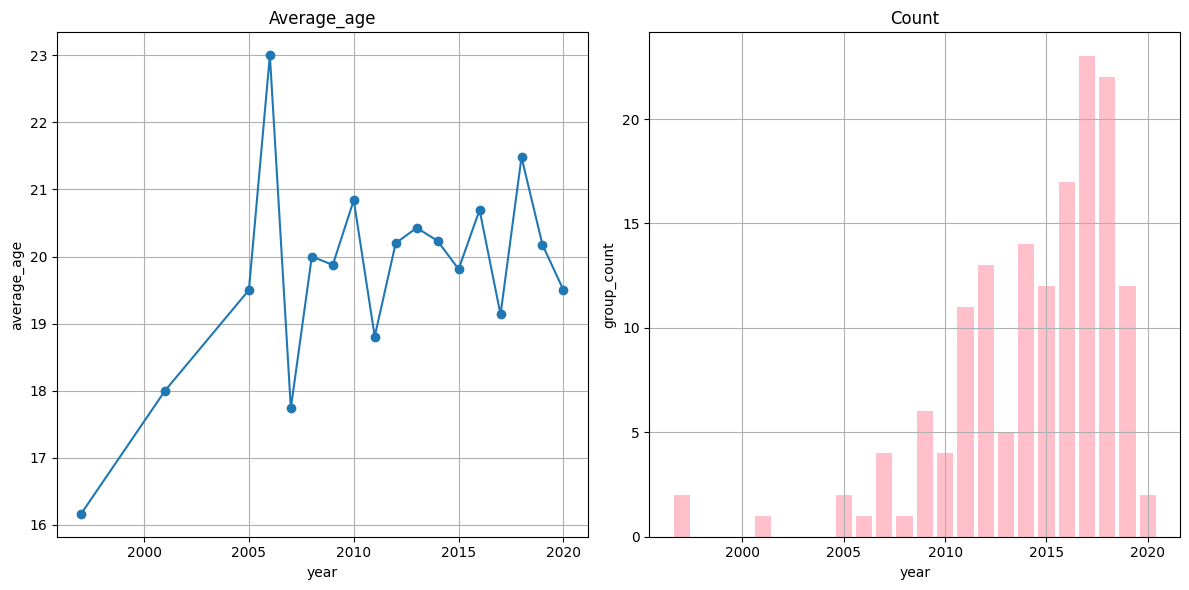

In [ ]:
#繪製平均出道年齡的時間趨勢
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
average_age_by_year = girlgroups_data.groupby('year')['Average_age'].mean()
plt.plot(average_age_by_year.index, average_age_by_year.values, marker='o')
plt.title('Average_age')
plt.xlabel('year')
plt.ylabel('average_age')
plt.grid(True)

#印出出道平均年齡最小的年份與出道平均年齡最大的年份
min_avg_age_year = average_age_by_year.idxmin()
min_avg_age_value = average_age_by_year.min()
max_avg_age_year = average_age_by_year.idxmax()
max_avg_age_value = average_age_by_year.max()
print(f"女團出道平均年齡最小的年份：{min_avg_age_year}，平均年齡：{min_avg_age_value:.2f}")
print(f"女團出道平均年齡最大的年份：{max_avg_age_year}，平均年齡：{max_avg_age_value:.2f}")

#繪製出道組數的時間趨勢
plt.subplot(1, 2, 2)
girlgroup_count_by_year = girlgroups_data['year'].value_counts().sort_index()
plt.bar(girlgroup_count_by_year.index, girlgroup_count_by_year.values, color='pink')
plt.title('Count')
plt.xlabel('year')
plt.ylabel('group_count')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

file_path = 'kpop_girl_groups.csv'
boygroups_data = pd.read_csv(file_path, encoding='ISO-8859-1')
average_age_column = 'Average_age'

女團平均出道年齡樣本數據的算術平均數為: 20.024026845637582
女團平均出道年齡樣本數據之中位數為: 20.0
女團平均出道年齡樣本數據中出現最頻繁的眾數為: 20.0


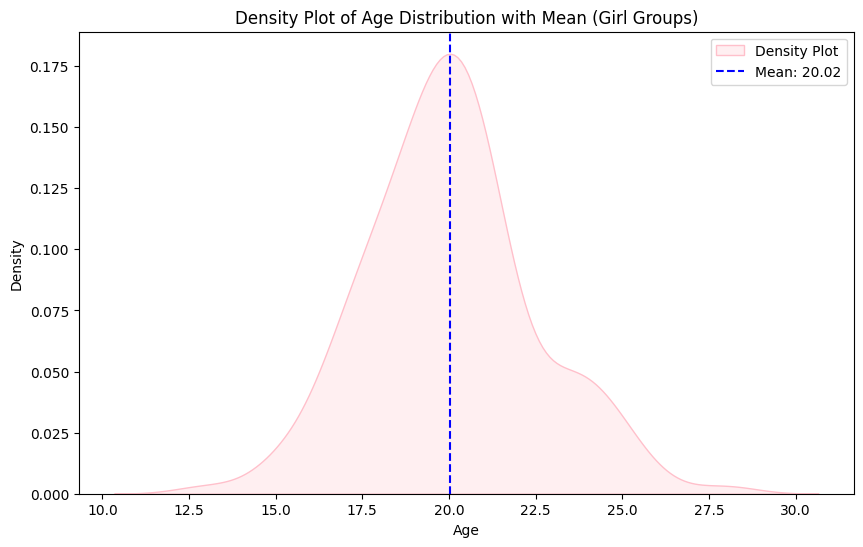

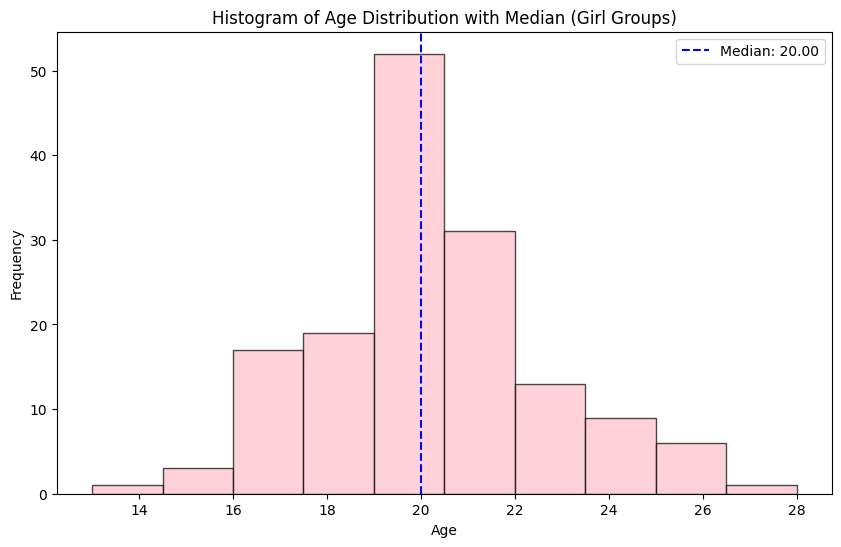

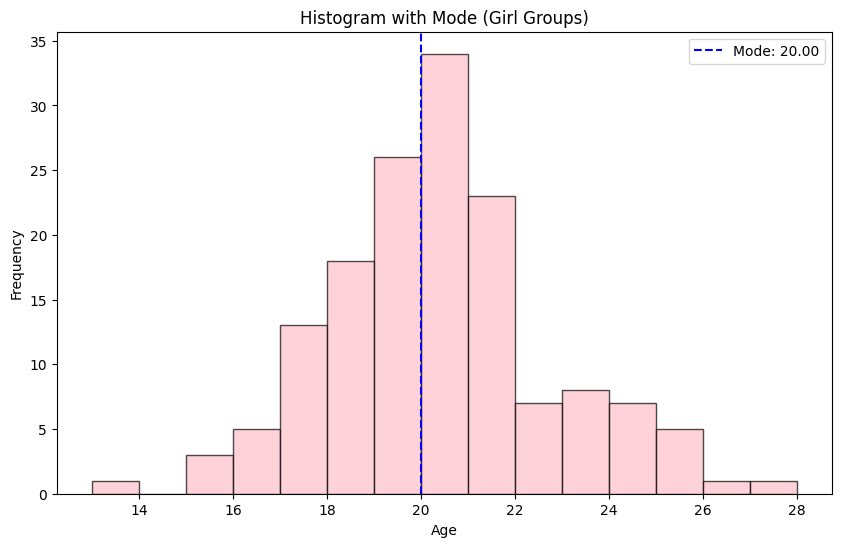

In [ ]:
#女團平均出道年齡樣本數據的中心趨勢：平均數（mean）、中位數（median）、眾數（mode）
#平均數（mean）
mean_age = np.mean(girlgroups_data[average_age_column])
print(f'女團平均出道年齡樣本數據的算術平均數為: {mean_age}')
#中位數（median)
girlgroups_data[average_age_column].fillna(girlgroups_data[average_age_column].median(), inplace=True) #使用中位數填充缺失值
median_age = np.median(girlgroups_data[average_age_column])
print(f'女團平均出道年齡樣本數據之中位數為: {median_age}')
#眾數
mode_age = girlgroups_data[average_age_column].mode()[0]
print(f'女團平均出道年齡樣本數據中出現最頻繁的眾數為: {mode_age}')
print('=======================================================================')

#繪製平均數的密度圖
plt.figure(figsize=(10, 6))
sns.kdeplot(girlgroups_data[average_age_column], fill=True, color='pink', label='Density Plot')
#標示平均數位置
plt.axvline(x=mean_age, color='blue', linestyle='--', label=f'Mean: {mean_age:.2f}')
plt.title('Density Plot of Age Distribution with Mean (Girl Groups)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()
print('=======================================================================')

#繪製中位數的直方圖
plt.figure(figsize=(10, 6))
plt.hist(girlgroups_data[average_age_column], bins=10, color='pink', edgecolor='black', alpha=0.7)
plt.axvline(x=median_age, color='blue', linestyle='--', label=f'Median: {median_age:.2f}')
plt.title('Histogram of Age Distribution with Median (Girl Groups)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()
print('=======================================================================')

#繪製眾數的直方圖
plt.figure(figsize=(10, 6))
plt.hist(girlgroups_data[average_age_column], bins=15, color='pink', edgecolor='black', alpha=0.7)
plt.axvline(x=mode_age, color='blue', linestyle='--', label=f'Mode: {mode_age:.2f}')
plt.title('Histogram with Mode (Girl Groups)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

女團平均出道年齡樣本數據中最大值減去最小值之範圍為: 15.0
女團平均出道年齡樣本數據之四分位數 Q1: 18.512500000000003
女團平均出道年齡樣本數據之四分位數 Q2 (中位數): 20.0
女團平均出道年齡樣本數據之四分位數 Q3: 21.0
女團平均出道年齡樣本數據之標準差: 2.416796870994948
女團平均出道年齡樣本數據之變異數: 5.84090711565097


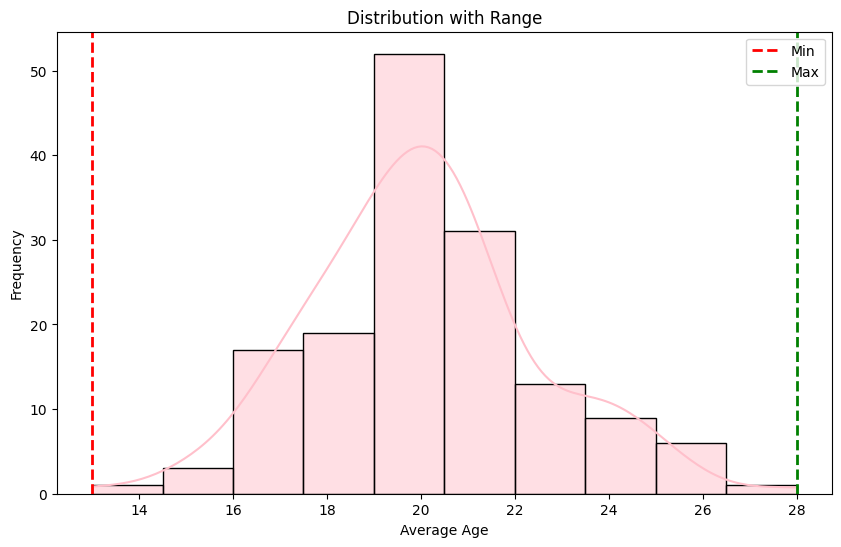

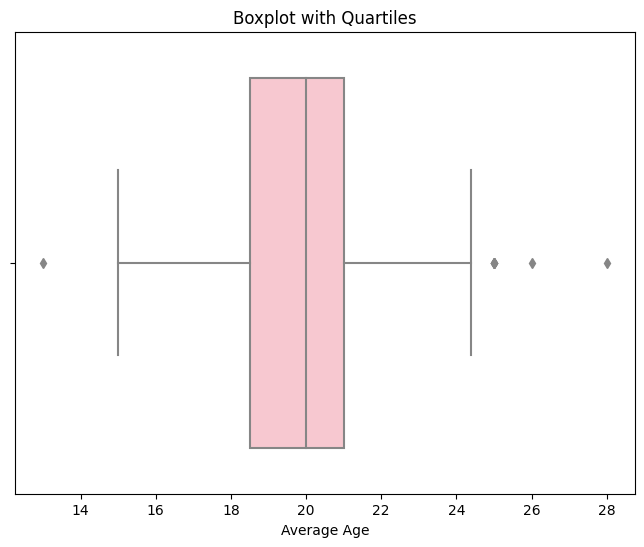

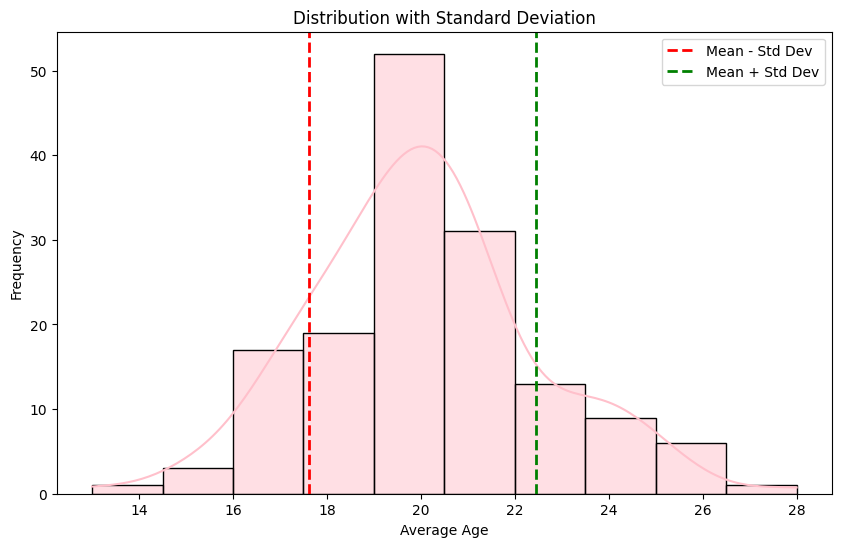

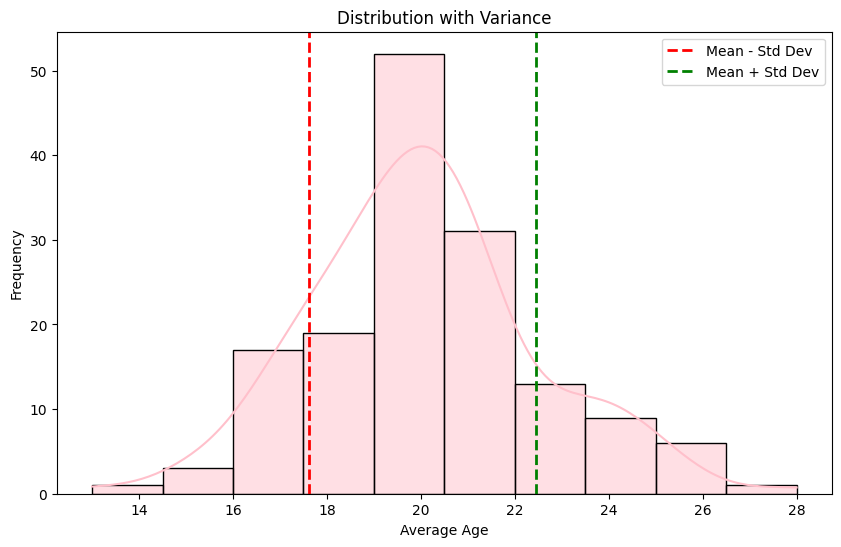

In [ ]:
#女團平均出道年齡樣本數據的散佈度：範圍、四分位數、標準差、變異數

#範圍
range_age = np.ptp(girlgroups_data[average_age_column])
print(f'女團平均出道年齡樣本數據中最大值減去最小值之範圍為: {range_age}')

#四分位數
q1 = np.percentile(girlgroups_data[average_age_column], 25)
q2 = np.percentile(girlgroups_data[average_age_column], 50)
q3 = np.percentile(girlgroups_data[average_age_column], 75)
print(f'女團平均出道年齡樣本數據之四分位數 Q1: {q1}')
print(f'女團平均出道年齡樣本數據之四分位數 Q2 (中位數): {q2}')
print(f'女團平均出道年齡樣本數據之四分位數 Q3: {q3}')

#標準差
std_dev_age = np.std(girlgroups_data[average_age_column])
print(f'女團平均出道年齡樣本數據之標準差: {std_dev_age}')

#變異數
var_age = np.var(girlgroups_data[average_age_column])
print(f'女團平均出道年齡樣本數據之變異數: {var_age}')
print('=======================================================================')


#範圍的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(girlgroups_data[average_age_column], bins=10, kde=True, color='pink')
plt.axvline(np.min(girlgroups_data[average_age_column]), color='red', linestyle='dashed', linewidth=2, label='Min')
plt.axvline(np.max(girlgroups_data[average_age_column]), color='green', linestyle='dashed', linewidth=2, label='Max')
plt.title('Distribution with Range')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#四分位數的盒鬚圖
plt.figure(figsize=(8, 6))
sns.boxplot(x=girlgroups_data[average_age_column], color='pink')
plt.title('Boxplot with Quartiles')
plt.xlabel('Average Age')
plt.show()

#標準差的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(girlgroups_data[average_age_column], bins=10, kde=True, color='pink')
plt.axvline(mean_age - std_dev_age, color='red', linestyle='dashed', linewidth=2, label='Mean - Std Dev')
plt.axvline(mean_age + std_dev_age, color='green', linestyle='dashed', linewidth=2, label='Mean + Std Dev')
plt.title('Distribution with Standard Deviation')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#變異數的直方圖
plt.figure(figsize=(10, 6))
sns.histplot(girlgroups_data[average_age_column], bins=10, kde=True, color='pink')
plt.axvline(mean_age - np.sqrt(var_age), color='red', linestyle='dashed', linewidth=2, label='Mean - Std Dev')
plt.axvline(mean_age + np.sqrt(var_age), color='green', linestyle='dashed', linewidth=2, label='Mean + Std Dev')
plt.title('Distribution with Variance')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.legend()
plt.show()

女團平均出道年齡樣本數據之偏度: 0.3017751082266939
女團平均出道年齡樣本數據之峰度: 0.49614939631576194


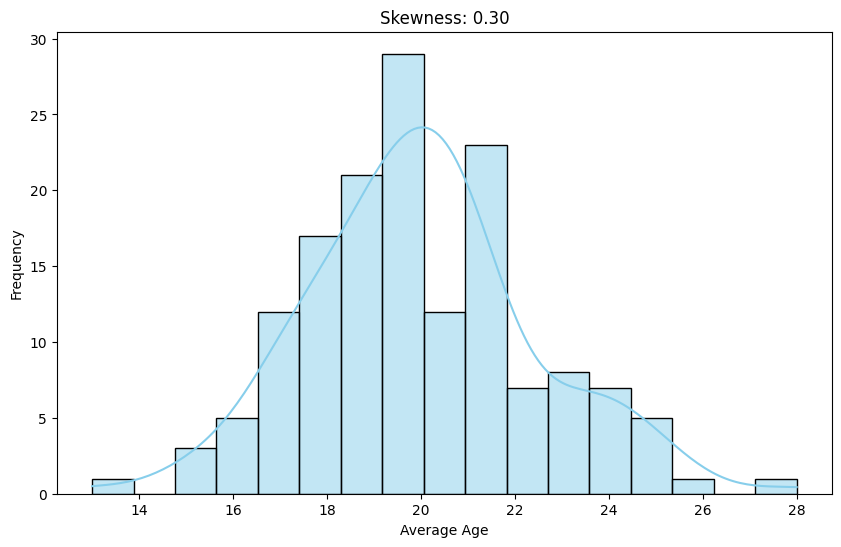

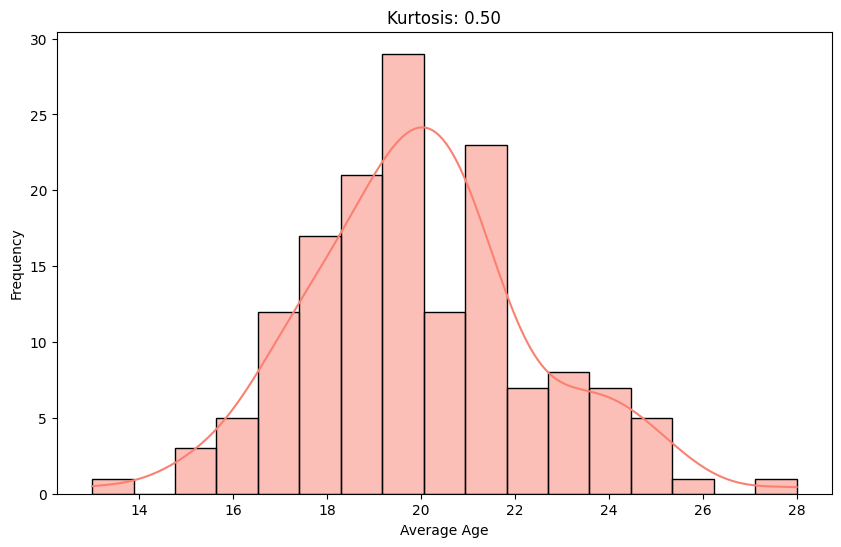

In [ ]:
#女團平均出道年齡樣本數據的分佈形狀：偏度（skewness）、峰度（kurtosis）
#偏度
skewness_age = skew(girlgroups_data[average_age_column])
print(f'女團平均出道年齡樣本數據之偏度: {skewness_age}')
#峰度
kurtosis_age = kurtosis(girlgroups_data[average_age_column])
print(f'女團平均出道年齡樣本數據之峰度: {kurtosis_age}')

#偏度直方圖與核密度估計圖
plt.figure(figsize=(10, 6))
sns.histplot(girlgroups_data['Average_age'], kde=True, color='skyblue')
plt.title(f'Skewness: {skewness_age:.2f}')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.show()

#峰度直方圖與核密度估計圖
plt.figure(figsize=(10, 6))
sns.histplot(girlgroups_data['Average_age'], kde=True, color='salmon')
plt.title(f'Kurtosis: {kurtosis_age:.2f}')
plt.xlabel('Average Age')
plt.ylabel('Frequency')
plt.show()